## Prediction and annotation of protein properties

The first part of this tutorial covers the annotation/experimental data available for proteins and the second part covers the prediction of protein properties.
1. Experimental data/ annotation
2. Prediction


## Experimental data / annotation

For only a small fraction of proteins (about 2%) the structure is available. PDBe-KB can be used to to place structural data to its biological context. For the rest (98% of all sequences) we can try to predict the properties from their sequences.


## Protein REST API (Uniprot)
[Proteins REST API](https://www.ebi.ac.uk/proteins/api/doc/) provides access to key biological data from UniProt and data from Large Scale Studies (LSS) mapped to UniProt.  It has five services (proteins, features, variation, proteomics, antigen). 

Access the API:

A) [REST API](https://www.ebi.ac.uk/proteins/api/doc/#/features)

B) Python script


In [29]:
import requests
# Example 1: Search by a UniProt accession in the proteins service
# You can access other features using the format used in the features page
# so for example /proteins/{accession}/isoforms to get isoform information
#

uniProtId = 'P21802'

requestURL = "https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=100&accession={}".format(uniProtId)

r = requests.get(requestURL)

if not r.ok:
    r.raise_for_status()
    sys.exit()

responseBody = r.text
# print(responseBody)  # Uncomment to see the output in screen 
f = open('response.xml', 'w')
f.write(responseBody)  # This writes the respones in an xml file. WEB BROWSER READABLE.

205598

In [30]:
#
# Example 2: Coordinates search using a gene name
#

geneId = 'FGFR2'

requestURL = "https://www.ebi.ac.uk/proteins/api/coordinates?offset=0&size=100&gene={}".format(geneId)

r = requests.get(requestURL)

if not r.ok:
    r.raise_for_status()
    sys.exit()

responseBody = r.text
# print(responseBody)  # Uncomment to see the output in screen 
f = open('response.xml', 'w')
f.write(responseBody)  # This writes the respones in an xml file. WEB BROWSER READABLE.

710825

## PDBe-KB

The PDBe-KB (Protein Data Bank in Europe- Knowledge Base) collecs functional annotations and predictions for proteins with structure data in the PDB archive. You can access the [PDBe-KB server](https://www.ebi.ac.uk/pdbe/pdbe-kb) directly. You can try it out by entering a PDB or UniProt identifier.

## PDBe REST API

The [PDBe REST API](https://www.ebi.ac.uk/pdbe/api/doc/pdb.html) has nine parts (PDB,COMPOUNDS, EMDB,NUCLEIC_MAPPING,SIFTS ,PISA, VALIDATION, TOPOLOGY, SEARCH). They are accessible from different REST API calls. Here are some examples of information the PDB part (first tabs) can give:

1.Electron density:
The statistics for electron density for structures from X-ray crystallography

2.Functional annotation:
Functional annotation of all ligands, i.e. 'bound' molecules

3.EBI Assembly:
Information for each assembly of a given PDB ID (includes the molecule name, type and class, the chains where the molecule occur, and the number of copies of each entity in the assembly)

4.EBI Ratio of observed residues:
The ratio of observed residues for each chain in each molecule of a pdb entry. The list of chains is sorted by observed_ratio, partial_ratio, and number_residues.

5.Binding sites:
Binding sites in the entry as per STRUCT_SITE records in PDB files such as ligand, residues in the site, description of the site, etc.

6.Secondary structure:
Residue ranges of regular secondary structure (alpha helices and beta strands) found in protein chains of the entry. For strands, sheet id can be used to identify a beta sheet.

7.Observed ranges:
i.e. segments of structural coverage of polymeric molecules that are modelled fully or partly.

Access to the API:

A) REST API

GET for individual queries and POST batch queries. [click here](https://www.ebi.ac.uk/pdbe/api/doc/pdb.html)

B) Python script

Below is an example for binding sites. The other properties can be accessed in a similar way.

In [31]:
import requests
import json
import csv

def getDataFromBindingSite():
    # The input should contain one or more comma-separated PDB ids
    input = '2n4p, 5mdi, 5mrg, 5x4f, 6b1g'
    # API Post URL
    # Binding Site
    post_url_1 = "https://www.ebi.ac.uk/pdbe/api/pdb/entry/binding_sites/"

    # Make POST request
    # WV 190206 - ADDED the 'data =' in below for it to work on Python dictionary

    response_1 = requests.post(post_url_1, json = input)
    queue_id_1 = str(response_1.json())
    resp_1 = "'Binding site': {}...".format(queue_id_1)
    return resp_1

if __name__ == '__main__':

    results1 = getDataFromBindingSite()
    # save the results to a json file
    json1 = json.dumps(results1)
    f = open("BindingSite.json", "w")
    f.write(json1)
    f.close()
    print(results1)

'Binding site': {'5x4f': [], '5mdi': [{'site_id': 'AC1', 'site_residues': [{'entity_id': 1, 'residue_number': 91, 'author_insertion_code': None, 'symmetry_symbol': '1_555', 'chem_comp_id': 'GLY', 'author_residue_number': 69, 'struct_asym_id': 'B', 'chain_id': 'B'}, {'entity_id': 1, 'residue_number': 88, 'author_insertion_code': None, 'symmetry_symbol': '1_555', 'chem_comp_id': 'ALA', 'author_residue_number': 66, 'struct_asym_id': 'B', 'chain_id': 'B'}], 'evidence_code': 'Software', 'details': 'BINDING SITE FOR RESIDUE ACT', 'ligand_residues': [{'entity_id': 2, 'residue_number': 1, 'author_insertion_code': None, 'chain_id': 'B', 'author_residue_number': 101, 'chem_comp_id': 'ACT', 'struct_asym_id': 'C'}]}], '5mrg': []}...


## InterProScan
[InterProScan](https://www.ebi.ac.uk/interpro/search/sequence-search) uses your input amino acid sequence, in FASTA format,
and scans it to find which proteins it matches in terms of structural similarities and functional predictions.

A. [API Interface](https://www.ebi.ac.uk/Tools/common/tools/help/index.html?tool=iprscan5)



In [33]:
import requests
headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'Accept': 'text/plain',
}

data = {
  'email': 'niloofar.shirvanizadeh@gmail.com',
  'sequence': 'MAAGGSGAESAPPTPSMSSLPLAALNVRVRHRLSLFLNVRTQVAADWTGLAEEMNFEYLEIRRLETHPDPTRSLLDDWQGRPGASVGRLLELLAKLGRDDVLVELGPSIEEDCRKYILKQQQEAAEKPLQVDSVDSSIPWMSGITIRDDPLGQMPEHFDAFICYCPSDIQFVQEMIRQLEQTNYRLKLCVSDRDVLPGTCVWSIASELIEKRCRRMVVVVSDDYLQSKECDFQTKFALSLSPGAHQKRLIPVKYKSMKKEFPSILRFITVCDYTNPCTKSWFWTRLARALSLP'
}

r = requests.post('https://www.ebi.ac.uk/Tools/services/rest/iprscan5/run', headers=headers, data=data)
print(r.status_code, r.reason)
print(r.text)

200 OK
iprscan5-R20190906-152648-0942-88900589-p1m


## STRING
[This database](https://string-db.org/) contains information about protein interactions. Below you can find python code to extract information via the STRING API.


In [34]:
## For a given list of proteins the script resolves them (if possible) to the best 
## matching STRING identifier and prints out the mapping on screen in the TSV format

from __future__ import print_function
import sys
import requests

def string():
    string_api_url = "http://string-db.org/api"
    output_format = "tsv-no-header"
    method = "get_string_ids"

    ## construct params dictionary

    params = {

        "identifiers" : "\r".join(["p53", "BRCA1", "cdk2", "Q99835"]), # your protein list
        "species" : 9606, # species NCBI identifier
        "limit" : 1, # only one (best) identifier per input protein
        "echo_query" : 1, # see your input identifiers in the output
        "caller_identity" : "www.awesome_app.org" # your app name

    }

    ## contruct method URL

    request_url = string_api_url + "/" + output_format + "/" + method

    ## Call STRING

    try:
        response = requests.post(request_url, params=params)
    except requests.exceptions.RequestException as e:
        print(e)
        sys.exit()

    ## Read and parse the results

    c = 0
    with open('string_results.txt', 'w') as f:
        f.write(response.text.strip())
        for line in response.text.strip().split("\n"):
            l = line.split("\t")
            print(l)
            input_identifier, string_identifier = l[0], l[2]

            print("Input:", input_identifier, "STRING:", string_identifier, sep="\t")
string()


['p53', '0', '9606.ENSP00000269305', '9606', 'Homo sapiens', 'TP53', 'Cellular tumor antigen p53; Acts as a tumor suppressor in many tumor types; induces growth arrest or apoptosis depending on the physiological circumstances and cell type. Involved in cell cycle regulation as a trans-activator that acts to negatively regulate cell division by controlling a set of genes required for this process. One of the activated genes is an inhibitor of cyclin-dependent kinases. Apoptosis induction seems to be mediated either by stimulation of BAX and FAS antigen expression, or by repression of Bcl-2 expression. In cooperation with mitochondrial PPIF is involved in  [...] ']
Input:	p53	STRING:	9606.ENSP00000269305
['BRCA1', '1', '9606.ENSP00000418960', '9606', 'Homo sapiens', 'BRCA1', "Breast cancer type 1 susceptibility protein; E3 ubiquitin-protein ligase that specifically mediates the formation of 'Lys-6'-linked polyubiquitin chains and plays a central role in DNA repair by facilitating cellula

## Prediction of biophysical characteristics:

The second part of this tutorial covers the prediction of biophysical characteristics from protein sequence. This involves sending data to a server, getting back the results, and displaying them. The essential parts of this process are:

1. Preparing the input: Converting a protein sequence (e.g. as read from a FASTA file) into an appropriate format
2. Using the API: Send the input to the API and get back the results, using two examples (DisoMine and DynaMine)
3. Plotting the results: Visualise the predictions to obtain insights into your protein

##  1. Preparing the input

The code below can read a protein sequence from a FASTA file (`read_fasta()`), which is then converted into a JSON for input to the web server (`fasta2json()`). Note that you can input your own sequence by uncommenting the line starting with `#dic = ` and pasting your own sequence identifier and sequence in the Python dictionary. You then have to re-run the code block.

The FASTA file used in this example contains the sequence for the p53 protein:

```
>sp|P04637|P53_HUMAN Cellular tumor antigen p53 OS=Homo sapiens OX=9606 GN=TP53 PE=1 SV=4
MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGP
DEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAK
SVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHE
RCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNS
SCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELP
PGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPG
GSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD

In [4]:
import json

def read_fasta(fileName):
    dic = {}
    cur_scaf = ''
    cur_seq = []
    for line in open(fileName):
        if line.startswith(">") and cur_scaf == '':
            cur_scaf = line[1:-1].split(' ')[0]
        elif line.startswith(">") and cur_scaf != '':
            dic[cur_scaf] = ''.join(cur_seq)
            cur_scaf = line[1:-1].split(' ')[0]
            cur_seq = []
        else:
            cur_seq.append(line.rstrip())
            dic[cur_scaf] = ''.join(cur_seq)
    return dic

def fasta2json(dic):
    """
    Read fasta-format file fil, return dict of form scaffold:sequence.
    """
    with open('output.json', 'w+') as outfile:
        json.dump(dic, outfile, indent=4)
    return dic

if __name__ == '__main__':
    dic = read_fasta("p53.fasta")

    #dic = {'mySeq': "ENTERYERSEQENCEHEREPLEASECHANGE"}
    results = fasta2json(dic)
    print(results)
    

{'sp|P04637|P53_HUMAN': 'MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD'}


## 2. Using the API (DisoMine)
The following steps are necessary to get the results from the [DisoMine](http://bio2byte.com/disomine/) REST API:

1. Read Json-format file as the input and loads it using the "json" module.
2. Make POST request with Json input body using "post" function.
3. Validate the response (Status 202 indicates that request has been accepted for processing)
4. Makes GET request to check queue request status.
5. Save the results to file when ready

In [5]:
import requests
import json
import time

WAIT_TIME = 5
TOTAL_TIME = 60
def getDataFromDisoMine():

    # Read input Json file
    file = open('output.json', 'r')
    inputFile = file.read()
    request_json = json.dumps(json.loads(inputFile))
    request_json = request_json[:-1] + ', "extra_predictions":"true"}'
    
    # API Post URL
    post_url = "http://bio2byte.be/disomine/api/"

    # Make POST request with Json Input body
    # WV 190206 - ADDED the 'data =' in below for it to work on Python dictionary
    response = requests.post(post_url, json = request_json)
    
    queue_id = str(response.json()['queue_id'])
    
    # Validating Response Code
    assert response.status_code == 202
    
    print("Submitted with queue ID: {}...".format(queue_id))
        
    # Now get results - this will happen when results available or when time limit reached
    time_waited = 0    
    get_url = "http://bio2byte.be/disomine/api/queue/"
    
    while time_waited / TOTAL_TIME < 1.0:

      # Get Request
      response = requests.get(get_url + queue_id)
      
      if response.status_code == 202:
        print("  Waiting for results...")

      elif response.status_code == 200:
        queryResults = json.loads(response.text)
        break
       
      else:
        print("Server error, response {}.".format(response.status_code))
        break
      
      time.sleep(WAIT_TIME)
      time_waited += WAIT_TIME


    return queryResults
    
if __name__ == '__main__':
    results = getDataFromDisoMine()

    # save the results to a json file
    json = json.dumps(results)
    f = open("Disomine_backbone_sidechain_efoldmine.json", "w")
    f.write(json)
    f.close()
    
    print(results)

Submitted with queue ID: 475...
  Waiting for results...
  Waiting for results...
{'id': 438, 'results': [{'proteinID': 'sp|P04637|P53_HUMAN', 'sequence': 'MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD', 'disomine': [0.41130316257476807, 0.5503429770469666, 0.547181248664856, 0.5060969591140747, 0.4889005124568939, 0.466287761926651, 0.4596223533153534, 0.4359571933746338, 0.4221497178077698, 0.400293231010437, 0.3903812766075134, 0.37155476212501526, 0.3879859149456024, 0.4265429675579071, 0.47335726022720337, 0.43697893619537354, 0.39726704359054565, 0.339160680770874, 0.32569241523742676, 0.3145276606082916, 0.29494524002075195, 0.2778395116

## 2. Using the API (DynaMine)

The DynaMine API is older but has additional functionality. It works in a similar way but can take different types of input. The methods of the DynaMineJSONInterface class are: 

1. A json_api_key and a boolean flag for running status (_running) are defined in the constructor method.
2. submit_sequence: The method accepts the protein sequence and a boolean var for prediction status as the inputs and return a discription of the submitted job (job ID).  
3. submit_uniprot_ids: The method does the same thing as the submit_sequence but here, accepts the uniprot ID.  
4. submit_job: The method accepts the job dict which is just created. It uses the poll_results and  print_progress methods to:
* Gives us a job ID.
* Makes the call blocking until the results are ready
5. dynamine_request: This is the post request with the json encoding of the job. It uses urllib modules  
6. poll_results: The job ID is the input and return a discription of the submitted request.  
7. print_progress:  It accepts the status and flag as the inputs abd based on  the status of the request ('queued' , 'running' or 'completed' ) it:
* Changes the state of the  '_running' boolean.
* Gives the status while processing the request.

You can also access the [DynaMine server](http://dynamine.ibsquare.be/) directly, where you can also find information on the meaning of the predictions.

In [6]:
"""
Created by Elisa Cilia on 2014-08-20.
Copyright (c) 2014 Elisa Cilia. All rights reserved.
"""
import json
import urllib.request, urllib.parse, urllib.error
import time
import sys

# creating a JSON interface

class DynaMineJSONInterface:

    def __init__(self, json_api_key):
        self._running = False
        self._json_api_key = '3469626345366a923473c455fd6bb283621e70a3ba5428f301501f8a'

    def submit_sequences(self, proteins, predictions_only=True):
        job = {'protocol': '1.0',
               'json_api_key': self._json_api_key,
               'sequences': proteins,
               'predictions_only': predictions_only,
               }
        return self._submit_job(job)

    def submit_uniprot_ids(self, uniprot_ids, predictions_only=True):
        job = {'protocol': '1.0',
               'json_api_key': self._json_api_key,
               'uniprot_ids': uniprot_ids,
               'predictions_only': predictions_only,
               }
        return self._submit_job(job)

    def _submit_job(self, job):
        # response gives us a job_id
        response = self._dynamine_request(job)
        if response['status'] == 'error':
            sys.stderr.write(response['message'] + '\n')
            sys.exit(1)
        job_id = response['job_id']
        self._print_progress(response['status'], False)
        # this makes the call blocking until the results are ready
        while response['status'] != 'completed':
            time.sleep(1.5)
            response = self._poll_results(job_id)
            if response['status'] == 'error':
                sys.stderr.write(response['message'] + '\n')
                sys.exit(1)
            self._print_progress(response['status'], True)
        return response['results']

    def _dynamine_request(self, request):
        # this is the post request with the json encoding of the job
        data = urllib.parse.urlencode({'batch': json.dumps(request)}).encode("utf-8")
        url = 'http://dynamine.ibsquare.be/batch_request'
        response = ''

        req = urllib.request.Request(url, data)
        http_response = urllib.request.urlopen(req)
        response = json.loads(http_response.read())

        #response = {'status': 'error', 'message': 'Unable to communicate with the server.Please verify that %s is up and running, otherwise concact the server administrator (ERROR: %s).'}

        return response

    def _poll_results(self, job_id):
        request = {'protocol': '1.0',
                   'json_api_key': self._json_api_key,
                   'job_id': job_id
                   }
        return self._dynamine_request(request)

    def _print_progress(self, status, flag):
        if status == 'queued':
            if flag:
                sys.stdout.write('Waiting to be processed.\n')
            else:
                sys.stdout.write('The request has been submitted.\n')
            self._running = False
        elif status == 'running':
            if not self._running:
                self._running = True
                sys.stdout.write('The request is being processed...')
            else:
                sys.stdout.write('.')
        elif status == 'completed':
            if not self._running:
                sys.stdout.write('The request is being processed...')
            sys.stdout.write('done.\n')
        elif status == 'error':
            sys.stderr.write('\n\nError while processing the request:\n\n')
        sys.stdout.flush()


if __name__ == '__main__':
    json_api_key = 'd03e71ca849d3bc5277fd68e7a0f45124df5be84bf348db65218982f'
    dynamine = DynaMineJSONInterface(json_api_key)

    # Read input Json file
    file = open('output.json', 'r')
    inputFile = file.read()
    proteins = json.loads(inputFile)
    
results = dynamine.submit_sequences(proteins, predictions_only=False)
print(results)

# save the results to a json file
json = json.dumps(results)
f = open("dynamine_output.json", "w")
f.write(json)
f.close()

The request has been submitted.
The request is being processed...done.
{'url': 'http://dynamine.ibsquare.be/www/files/batch/dirb_9e9a0815506c34c79cd8f26e9504b25a/Dynamine_b_9e9a0815506c34c79cd8f26e9504b25a.zip', 'predictor': 'v 3.0', 'predictions': {'sp_P04637_P53_HUMAN': [['M', 0.384], ['E', 0.372], ['E', 0.385], ['P', 0.398], ['Q', 0.431], ['S', 0.46], ['D', 0.489], ['P', 0.505], ['S', 0.524], ['V', 0.545], ['E', 0.564], ['P', 0.586], ['P', 0.586], ['L', 0.608], ['S', 0.629], ['Q', 0.656], ['E', 0.685], ['T', 0.72], ['F', 0.758], ['S', 0.786], ['D', 0.811], ['L', 0.809], ['W', 0.812], ['K', 0.795], ['L', 0.782], ['L', 0.777], ['P', 0.759], ['E', 0.746], ['N', 0.747], ['N', 0.739], ['V', 0.742], ['L', 0.737], ['S', 0.73], ['P', 0.721], ['L', 0.723], ['P', 0.709], ['S', 0.707], ['Q', 0.708], ['A', 0.719], ['M', 0.751], ['D', 0.773], ['D', 0.765], ['L', 0.729], ['M', 0.709], ['L', 0.69], ['S', 0.695], ['P', 0.705], ['D', 0.724], ['D', 0.743], ['I', 0.734], ['E', 0.742], ['Q', 0.736], ['

## 3. Plotting the results (for DisoMine, DynaMine and EFoldMine)
Here we read back in the output from the DisoMine server, which contains several predictions. The steps in the code are:

Load a Json-format file with the input (results saved from DisoMine) using the "json" module.
Defines an index for each residue.
Defines the corresponding scores for disorder (DisoMine), side chain dynamics, backbone dynamics (DynaMine) and early folding (EFoldMine) for each residue.
Create plots using the matplotlib library.
Note that you might have to install the matplotlib library first - run the code block directly underneath.

In [1]:
! python3 -mpip install matplotlib  # install the required package.

You should consider upgrading via the 'pip install --upgrade pip' command.


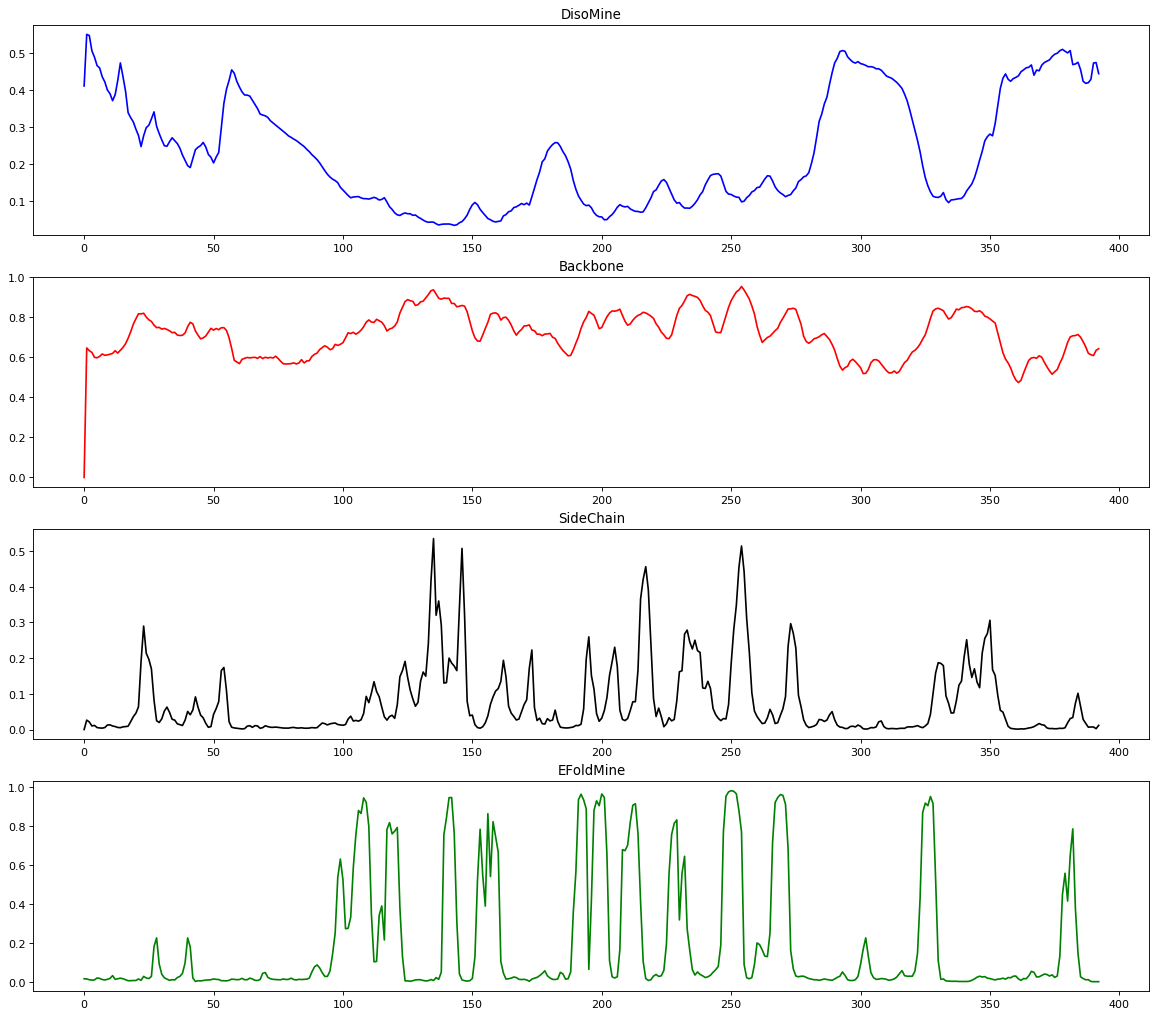

In [7]:
import matplotlib.pyplot as plt
import json

# Read input Json file
file = open('Disomine_backbone_sidechain_efoldmine.json', 'r')
input = file.read()
request_json = json.loads(input)

# residue index
seq = request_json["results"][0]['sequence']
#DisoMine Score
disomine = request_json["results"][0]['disomine']
#backbone Score
backbone = request_json["results"][0]['backbone']
#sidechain Score
sidechain = request_json["results"][0]['sidechain']
#efoldmine Score
efoldmine = request_json["results"][0]['efoldmine']
# creating a plot
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

#ploting the DisoMine results
axes = fig.add_subplot(411)
axes.plot(range(len(seq)), disomine, color="b")
axes.set_title("DisoMine")

#ploting the Backbone results 
axes = fig.add_subplot(412)
axes.plot(range(len(seq)), backbone, color="r")
axes.set_title("Backbone")

#ploting the SideChain results
axes = fig.add_subplot(413)
axes.plot(range(len(seq)), sidechain, color="black")
axes.set_title("SideChain")

#ploting the EFoldMine results
axes = fig.add_subplot(414)
axes.plot(range(len(seq)), efoldmine, color="g")
axes.set_title("EFoldMine")

plt.show()

## Overview prediction of deleteriousness of mutants:
The second part of this tutorial covers the prediction of the (likely) effect of single amino acid variants of human proteins on the organism. These can be deleterious (bad) for the human, or have no effect. To do so we are using the DEOGEN2 server, and then visualise the prediction scores. The steps are:

1. Get the internal deogen2 sequence id from a uniprot id. seq_uniprot_id2seq_id
2. Send the data using a POST request and wait for the results getDataFromDEOGEN2 Note that this function will get all the scores for all possible single amino acid variants in this protein.
You can also access the [DEOGEN2 MutaFrame server](http://deogen2.mutaframe.com/) server directly, where you can also find information on the meaning of the predictions.

In [25]:
! pip install bs4  # install the required package

    100% |████████████████████████████████| 102kB 2.9MB/s a 0:00:01
  Running setup.py bdist_wheel for bs4 ... done
  Stored in directory: /home/jose/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [11]:
import json
import requests
import re
from bs4 import BeautifulSoup

# A function for getting sequence id from sequence uniprot ID.
# You can enter the uniprot id of your preferred human protein sequence.  
def seq_uniprot_id2seq_id(seq_prefix):

    # Set the URL to webscrape from
    url = 'https://deogen2.mutaframe.com/sequence_finder.php?152539&sequence_prefix='+seq_prefix

    # Connect to the URL
    response = requests.get(url)

    # Parse HTML and save to BeautifulSoup object¶
    soup = BeautifulSoup(response.text, "html.parser")
    p = re.compile(r'data_sequence_id="\d\d\d\d\d')
    mo = p.search(str(soup.contents)).group()
    sequence_id = mo[18:]
    print(sequence_id)
    return sequence_id
     
# Getting data from DEOGEN2.
def getDataFromDEOGEN2(sequence_id, mutation):

    # defining the api-endpoint
    api_endpoint = "https://deogen2.mutaframe.com/fetch_results.php"

    # API key
    key = 1524214674089
    sequence_id = sequence_id
    mutation = mutation
    structure_id = 0

    # data to be sent to api
    data = {
        " ": key,
        "sequence_id": sequence_id,
        "mutation": mutation,
        "structure_id": structure_id,
    }

    # Make POST request with Input body
    response = requests.get(api_endpoint, data)
    queryResults = json.loads(response.text)
    return queryResults

if __name__ == '__main__':

    seq_uniprot_id = 'P36897'
    #seq_uniprot_id = '' # You may uncomment it and write the uniprot id of your preferred human protein.
    seq_uniprot_id2seq_id(seq_uniprot_id )
    
    results = getDataFromDEOGEN2(64689, 'N45S')
    print(results)
    
    # save the results to a json file
    json = json.dumps(results)
    f = open("DEOGEN2.json", "w")
    f.write(json)
    f.close()

64689
{'deogen2': {'prediction': 0.927375, 'features': {'provean': -3.31, 'conservation index': 0.22961454043687, 'probability': 2.0030685628953, 'early folding': -1.593, 'log-odd ratio': 1.7917594692281, 'interaction': 1, 'rvis': -0.271755481, 'gdi': 0.58837, 'recessiveness': 0.77849, 'essentiality': 1, 'pathway': 0}, 'contribution': {'provean': 0.14807462711912, 'conservation index': -0.067067377585845, 'probability': -0.037919316716986, 'early folding': 0.0024153921155141, 'log-odd ratio': 0.25393570735043, 'interaction': 0.0079703881307524, 'rvis': 0.019742243830915, 'gdi': 0.0343571916888, 'recessiveness': 0.10405744136885, 'essentiality': 0.05397585174286, 'pathway': -0.003693229465238}}, 'all_deogen2': {'R372K': '0.393271', 'R372I': '0.436919', 'R372H': '0.433734', 'R372N': '0.441193', 'R372M': '0.442047', 'R372L': '0.442549', 'R372C': '0.440055', 'R372A': '0.442438', 'R372G': '0.444239', 'R372F': '0.444239', 'R372E': '0.440353', 'R372D': '0.442805', 'R372Y': '0.445446', 'R372S'

## Visualising the DEOGEN2 results for a sequence position
The steps to visualise the results are:
1. Load the JSON file with the results from the DEOGEN2 server for all possible single amino acid variants
2. Pull out the scores for a particular sequence position (defined by `res`)
3. Create the plots using functions from the matplotlib library.

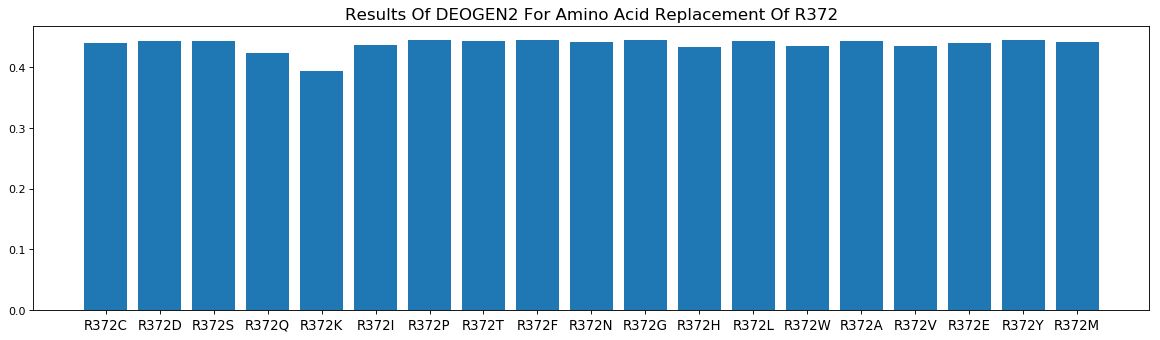

None


In [12]:
import matplotlib.pyplot as plt
import json

def deogen2plot(res):

    # Read input Json file
    file = open('DEOGEN2.json', 'r')
    input = file.read()
    request_json = json.loads(input)

    # mutation DEOGEN2 scores

    aa = 'CDSQKIPTFNGHLRWAVEYM'
    prediction = []
    mutations =[]
    for x in aa:
        if x != res[0]:
            df = request_json['all_deogen2'][res + x]
            prediction.append(df)
            mutations.append(res + x)

    deogen2 = [float(i) for i in prediction]

    # creating a plot

    fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

    #ploting the DEOGEN2 results
    
    axes = fig.add_subplot(312)
    axes.bar(mutations, deogen2)
    plt.xticks(mutations, size = 12)
    axes.set_title("Results Of DEOGEN2 For Amino Acid Replacement Of " + res , size = 15)

    plt.show()

if __name__ == '__main__':
    results = deogen2plot('R372')
    print(results)

## ELM
Below  is a simple python code for extract information from ELM API.

In [28]:
import requests

seq= 'MAAGGSGAESAPPTPSMSSLPLAALNVRVRHRLSLFLNVRTQVAADWTGLAEEM\
NFEYLEIRRLETHPDPTRSLLDDWQGRPGASVGRLLELLAKLGRDDVLVELGPS\
IEEDCRKYILKQQQEAAEKPLQVDSVDSSIPWMSGITIRDDPLGQMPEHFDAFI\
CYCPSDIQFVQEMIRQLEQTNYRLKLCVSDRDVLPGTCVWSIASELIEKRCRRM\
VVVVSDDYLQSKECDFQTKFALSLSPGAHQKRLIPVKYKSMKKEFPSILRFITV\
CDYTNPCTKSWFWTRLARALSLP'

# defining the api-endpoint
api_endpoint = "http://elm.eu.org/start_search/"

#Submiting a protein identifier
def elm_id_submit():
    uniprot_id = 'P69905' + '.tsv'
    url = api_endpoint + uniprot_id
    response = requests.get(url)
    # Output file
    with open('ELM_result1.txt', 'w') as f:
        f.write(response.content.decode("utf-8"))
        print(response.content.decode("utf-8"))
    return(response.content)

#Submitting a single sequence
def elm_seq_submit():
    url = api_endpoint + seq
    response = requests.get(url)
    # Output file
    with open('ELM_result2.txt', 'w') as f:
        f.write(response.content.decode("utf-8"))
        print(response.content.decode("utf-8"))
    return response.content

elm_id_submit()
elm_seq_submit()


elm_identifier	start	stop	is_annotated	is_phiblastmatch	is_filtered	phiblast	topodomfilter	taxonfilter	structure
CLV_PCSK_SKI1_1	32	36	False	False	False	False	False	False	False
DOC_MAPK_DCC_7	91	99	False	False	False	False	False	False	False
DOC_MAPK_gen_1	91	99	False	False	False	False	False	False	False
DOC_USP7_MATH_1	131	135	False	False	False	False	False	False	False
DOC_USP7_UBL2_3	57	61	False	False	False	False	False	False	False
DOC_USP7_UBL2_3	8	12	False	False	False	False	False	False	False
DOC_WW_Pin1_4	1	6	False	False	False	False	False	False	False
DOC_WW_Pin1_4	116	121	False	False	False	False	False	False	False
LIG_14-3-3_CanoR_1	32	38	False	False	False	False	False	False	False
LIG_FHA_1	117	123	False	False	False	False	False	False	False
LIG_FHA_1	66	72	False	False	False	False	False	False	False
LIG_LIR_Nem_3	31	37	False	False	True	False	False	True	False
LIG_LIR_Nem_3	42	47	False	False	True	False	False	True	False
LIG_SH2_STAT5	43	46	False	False	False	False	False	False	False
LIG_WD40_WDR5

b''